<a href="https://colab.research.google.com/github/SeyoungYoo/DLforEveryone/blob/main/Season01/ML_Lab07_2_Meet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 46.7MB/s 
     |████████████████████████████████| 512kB 29.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=eeae794d8c03d354673849bfd46bf6f128e03eaae4fb3f5203155d5d40695bca
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

##**Mnist Dataset**

* 손글씨(숫자)를 판별하기 위한 데이터셋

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/minist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
nb_classes = 10

In [4]:
# MNIST data image of shape 28*28=784
X = tf.placeholder(tf.float32, shape=[None, 784])
# 0~9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

In [5]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y,1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
# parameters
training_epochs = 15
batch_size = 100

* epoch : 전체 데이터셋을 한 번 학습시키는 것
* batch_size : 데이터셋이 너무 클 경우 데이터셋을 나누는 단위

In [16]:
sess = tf.Session()
# Initialize Tensorflow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
   avg_cost = 0
   total_batch = int(mnist.train.num_examples / batch_size)

   for i in range(total_batch):
     batch_xs, batch_ys = mnist.train.next_batch(batch_size)
     c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
     avg_cost += c / total_batch

   print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost= 3.072686710
Epoch: 0002 cost= 1.120273237
Epoch: 0003 cost= 0.883670900
Epoch: 0004 cost= 0.769627356
Epoch: 0005 cost= 0.698926364
Epoch: 0006 cost= 0.649354694
Epoch: 0007 cost= 0.612802618
Epoch: 0008 cost= 0.583442486
Epoch: 0009 cost= 0.559243199
Epoch: 0010 cost= 0.538588152
Epoch: 0011 cost= 0.521602100
Epoch: 0012 cost= 0.506353918
Epoch: 0013 cost= 0.492975099
Epoch: 0014 cost= 0.480788944
Epoch: 0015 cost= 0.470586736
Accuracy:  0.8918


In [17]:
import matplotlib.pyplot as plt
import random

* 테스트 이미지와 라벨로 모델 테스트하기

Label: [7]
Prediction: [7]


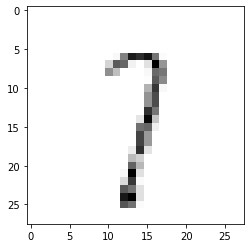

In [19]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:", sess.run(tf.arg_max(hypothesis,1),
                              feed_dict={X: mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()